In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [3]:
titanic_data = sns.load_dataset('titanic')

In [4]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [18]:
titanic_data.duplicated().sum()

np.int64(107)

Data Reduction: Unwanted Columns

In [6]:
columns_remove = ['deck', 'embarked','alive', 'class'] #remove deck, embarked, alive, pclass becouse deck has most null values other 3 columns are repeated columns
titanic_data.drop(columns = columns_remove, inplace=True)

Imputation

In [7]:
titanic_data['sex'] = titanic_data['sex'].map({'female': 0, 'male': 1})

In [21]:
titanic_data['age'].median()

np.float64(28.0)

In [8]:
titanic_data['age'].fillna(round(titanic_data['age'].mean()), inplace=True)
titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0], inplace=True)

Droping The Duplicates

In [9]:
titanic_data.drop_duplicates(inplace=True)

Checking the Errors

In [10]:
titanic_data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [11]:
titanic_data.duplicated().sum()

np.int64(0)

In [14]:
titanic_data.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,773.0,0.415265,0.493087,0.00,0.00,0.0,1.000,1.0000
pclass,773.0,2.240621,0.855676,1.00,1.00,3.0,3.000,3.0000
sex,773.0,0.623545,0.484810,0.00,0.00,1.0,1.000,1.0000
age,773.0,29.836248,13.770979,0.42,21.00,30.0,36.000,80.0000
sibsp,773.0,0.529107,0.991280,0.00,0.00,0.0,1.000,8.0000
parch,773.0,0.421734,0.841380,0.00,0.00,0.0,1.000,6.0000
fare,773.0,35.058996,52.442778,0.00,8.05,16.1,34.375,512.3292


In [15]:
titanic_data.describe(include='object').T

,count,unique,top,freq
who,773,3,man,442
embark_town,773,3,Southampton,563


Data Visualization

In [17]:
cat_col = titanic_data.select_dtypes(exclude=['int', 'float']).columns
num_col = titanic_data.select_dtypes(include = ['int', 'float']).columns.tolist() #exclude = 'object'

print(cat_col)
print(num_col)

Index(['who', 'adult_male', 'embark_town', 'alone'], dtype='object')
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']


survived


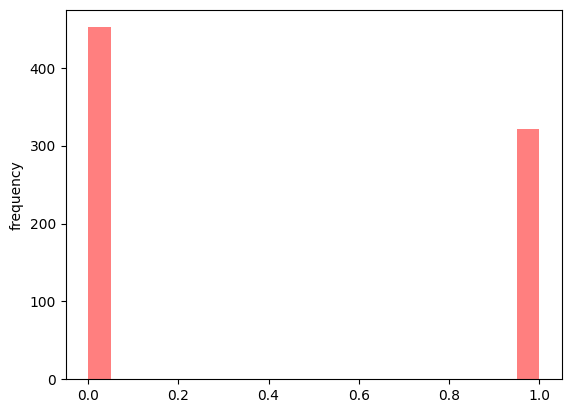

pclass


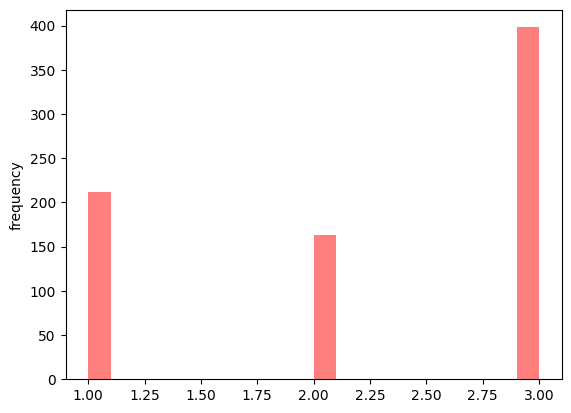

sex


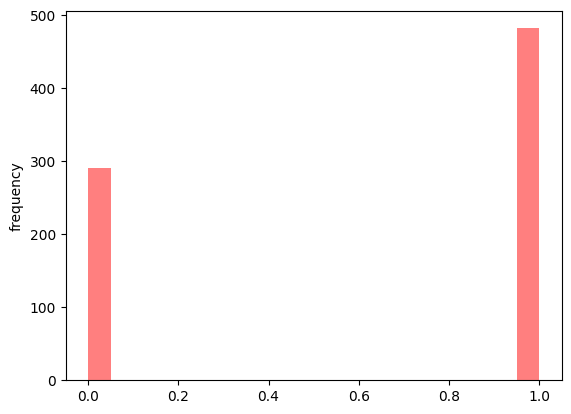

age


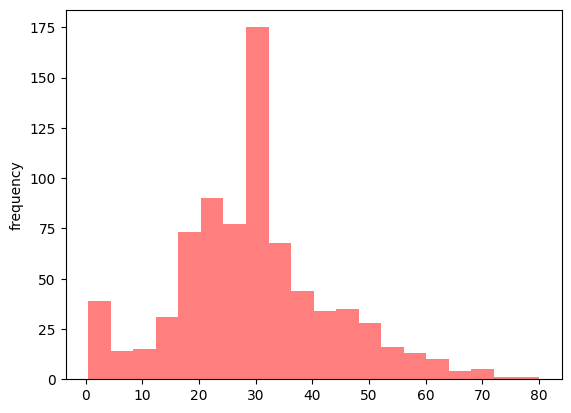

sibsp


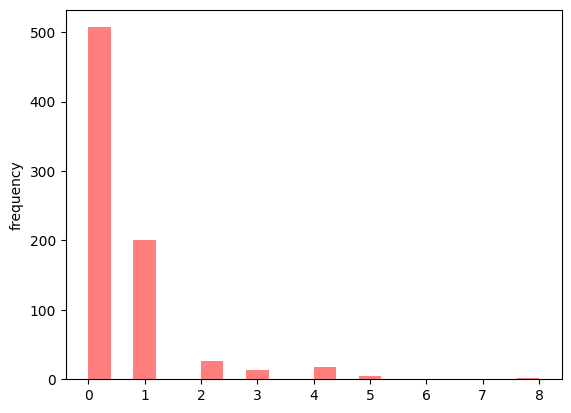

parch


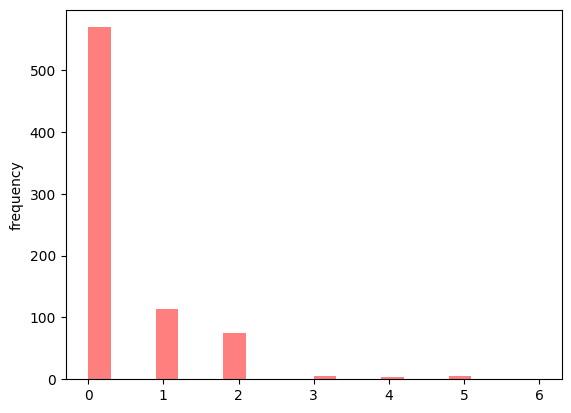

fare


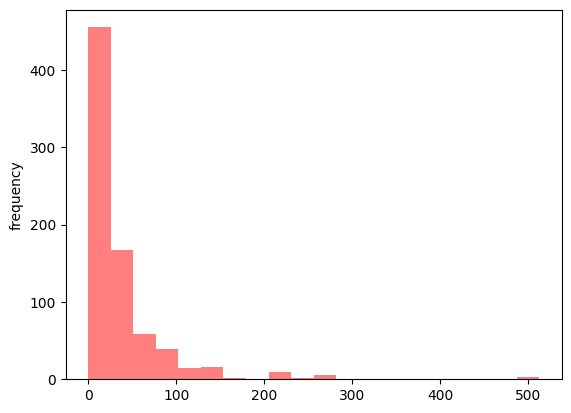

In [18]:
# Univeriate analysis
for col in num_col:
    print(col)
    plt.subplot(1,1,1)
    titanic_data[col].plot(kind = 'hist', alpha=0.5, bins=20, color='r') 
    plt.ylabel('frequency')
    plt.show()

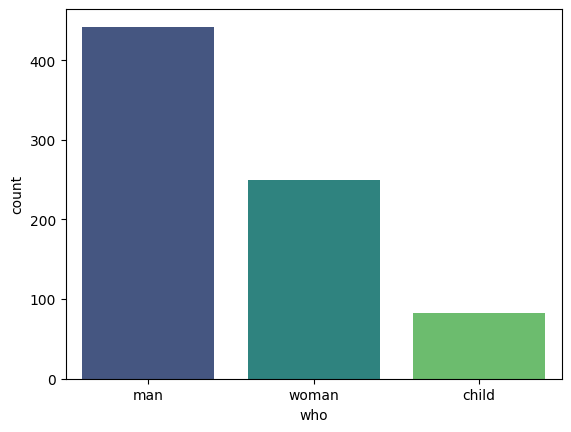

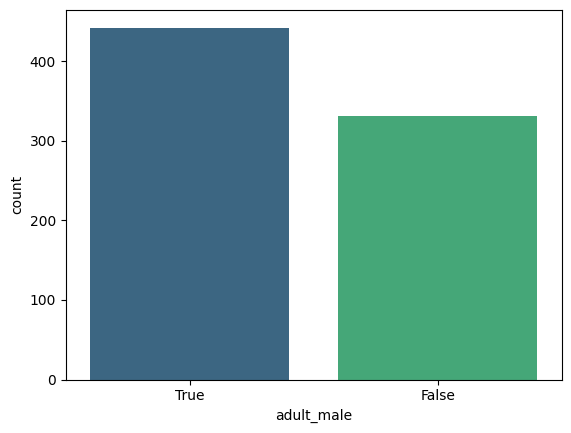

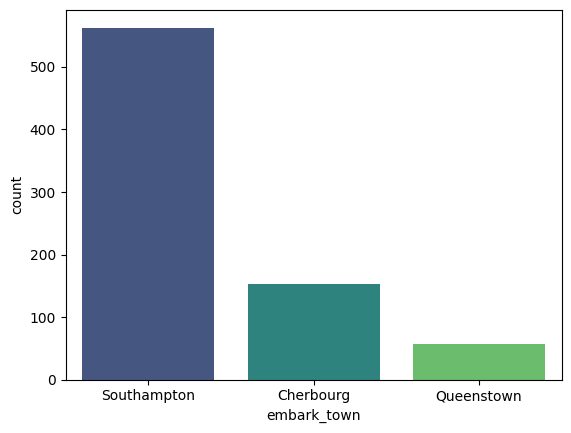

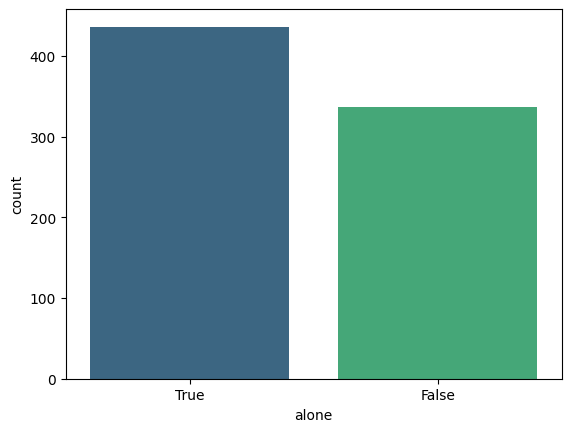

In [19]:
for col in cat_col:
    plt.figure()
    plt.subplot(1,1,1)
    sns.countplot(x=col, data=titanic_data, order=titanic_data[col].value_counts().index, palette='viridis')
    plt.show()

Finding The Correlation

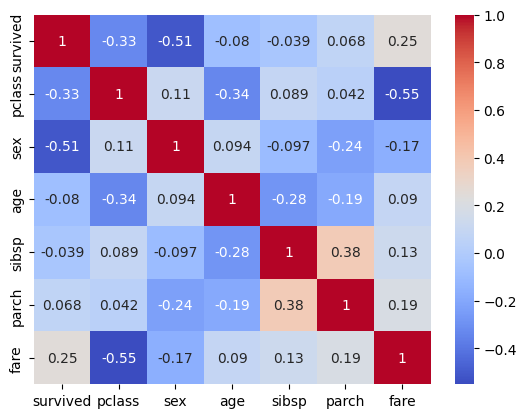

In [30]:
corr = titanic_data[num_col].corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

In [32]:
grouped_data = {
    'sex_survived': titanic_data.groupby(['sex', 'survived']).agg({'survived':'count'}),
    'pclass_survived': titanic_data.groupby(['pclass','survived']).agg({'survived':'count'}),
    'who_survived': titanic_data.groupby(['who','survived']).agg({'survived':'count'}),
    'adult_male_survived': titanic_data.groupby(['adult_male', 'survived']).agg({'survived':'count'}),
    'embark_town_survived': titanic_data.groupby(['embark_town', 'survived']).agg({'survived':'count'}),
    'alone_survived': titanic_data.groupby(['alone', 'survived']).agg({'survived':'count'}),
    'sibsp_survived': titanic_data.groupby(['sibsp','survived']).agg({'survived':'count'}),
    'parch_survived': titanic_data.groupby(['parch','survived']).agg({'survived':'count'})
}

grouped_data['alone_survived']

survived
alone survived          
False 0              164
      1              173
True  0              288
      1              148

Modling

In [21]:
# Select relevant features and target variable
X = titanic_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = titanic_data['survived']

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_classifier

RandomForestClassifier()

In [24]:
rf_classifier.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1965957874),
 DecisionTreeClassifier(max_features='sqrt', random_state=626000491),
 DecisionTreeClassifier(max_features='sqrt', random_state=197312462),
 DecisionTreeClassifier(max_features='sqrt', random_state=551592485),
 DecisionTreeClassifier(max_features='sqrt', random_state=45739032),
 DecisionTreeClassifier(max_features='sqrt', random_state=630146088),
 DecisionTreeClassifier(max_features='sqrt', random_state=1124016631),
 DecisionTreeClassifier(max_features='sqrt', random_state=1047202291),
 DecisionTreeClassifier(max_features='sqrt', random_state=1493419455),
 DecisionTreeClassifier(max_features='sqrt', random_state=547523401),
 DecisionTreeClassifier(max_features='sqrt', random_state=1490232372),
 DecisionTreeClassifier(max_features='sqrt', random_state=1159521685),
 DecisionTreeClassifier(max_features='sqrt', random_state=1753653785),
 DecisionTreeClassifier(max_features='sqrt', random_state=424519521),
 DecisionTreeC

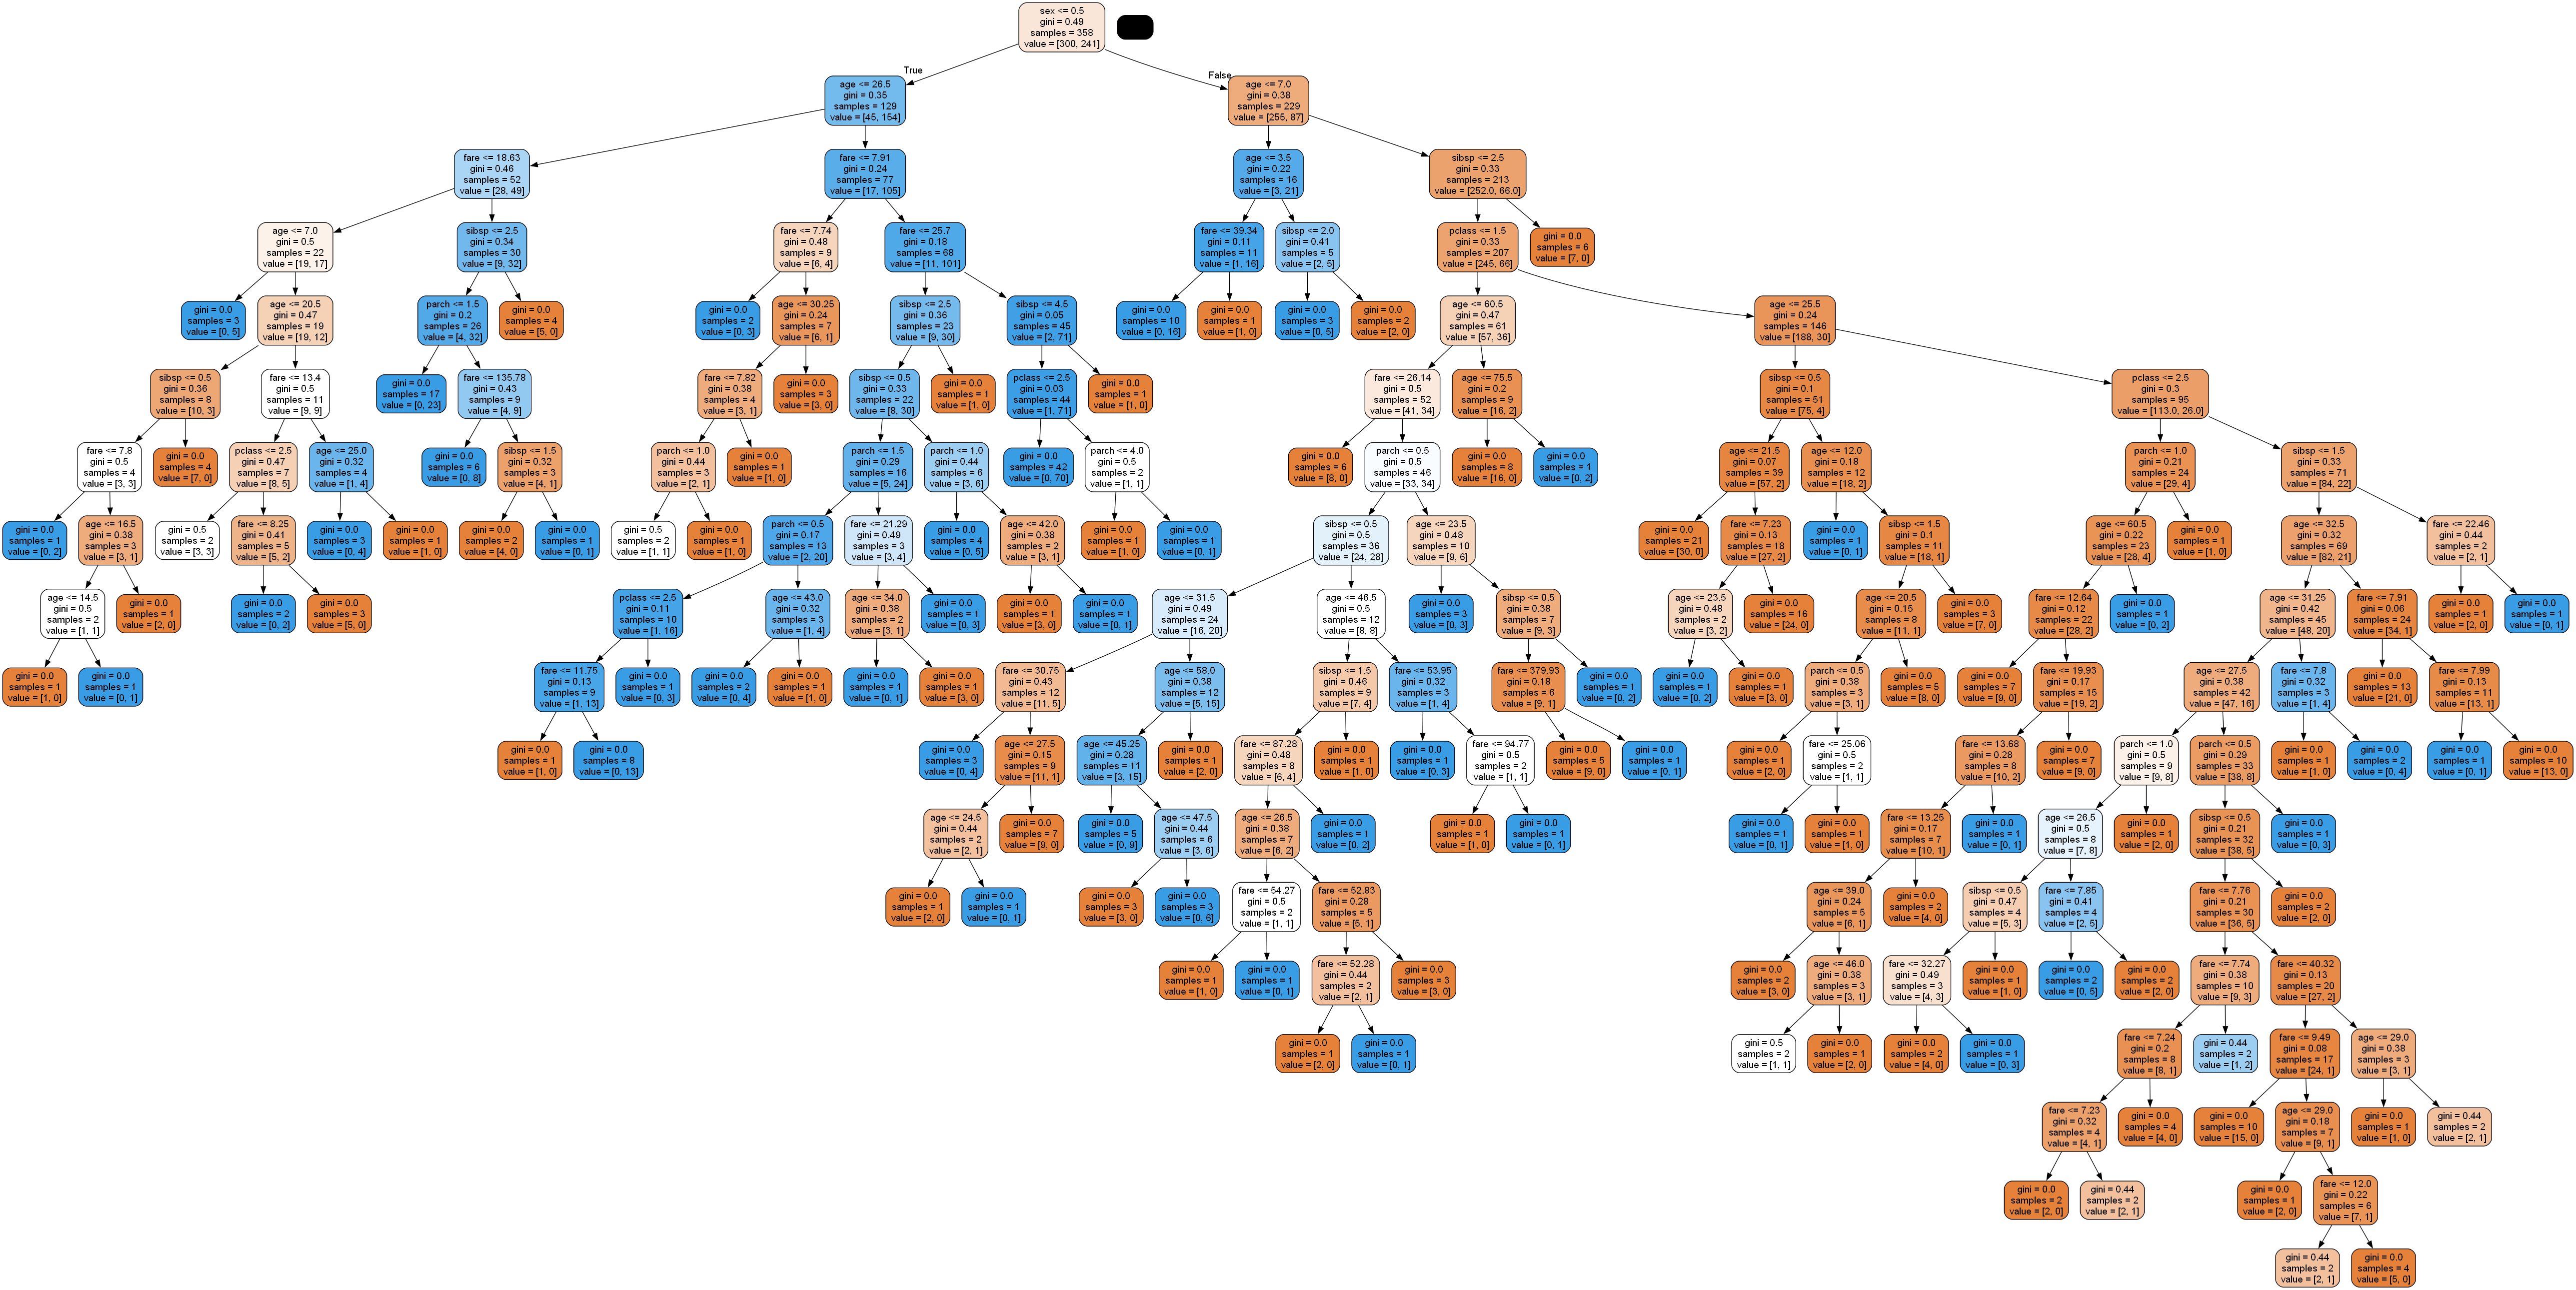

In [25]:
# Choose a tree from the random forest (e.g., the first tree)
estimator = rf_classifier.estimators_[3]

# Export the tree to DOT format
dot_data = export_graphviz(estimator, out_file=None, 
                           feature_names=X_train.columns,  
                           rounded=True, proportion=False, 
                           precision=2, filled=True)

# Convert DOT data to a graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Display the graph
Image(graph.create_png())

- **estimator:** This is the decision tree estimator you want to visualize. In this context, it refers to one of the individual trees in the Random Forest (rf_classifier.estimators_[0]).

- **out_file=None:** Setting out_file to None means that the output will be returned as a string rather than being written to a file. This is useful for further processing, such as rendering the graph directly in a notebook.

- **feature_names=X_train.columns:** feature_names is a list of the feature names used in the model. By passing X_train.columns, you're providing the names of the features that were used to train the model. This makes the visualization more interpretable by showing the actual feature names instead of generic names like X[0], X[1], etc.

- **rounded=True:** This option makes the corners of the nodes in the graph rounded. It is purely a stylistic choice to make the graph look nicer.

- **proportion=False:** If proportion is set to True, the width of the nodes will be scaled according to the proportion of samples they represent. Setting it to False means all nodes will have the same width, regardless of the number of samples they contain.

- **precision=2:** This sets the number of decimal places for numerical values (like impurity, thresholds, etc.) displayed in the graph. precision=2 means that these values will be shown with two decimal places.

- **filled=True:** When filled is set to True, the nodes are color-coded to reflect the majority class or value of the node. This makes it easier to see which class a node predominantly represents.

In [51]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [52]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 75.86206896551724
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       136
           1       0.76      0.60      0.67        96

    accuracy                           0.76       232
   macro avg       0.76      0.74      0.74       232
weighted avg       0.76      0.76      0.75       232



In [53]:
titanic_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']].head()

,pclass,sex,age,sibsp,parch,fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


Predicting For New Data

In [27]:
new = [[3,0,25,0,2,50]]
y_pred = rf_classifier.predict(new)
y_pred[0]

np.int64(0)